In [ ]:
import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
# load in data with 80:20 split for training:test
with open('Final_Data_sets80.pickle', "rb") as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

## Shallow-learning to beat
Lets see what a shallow-learning machine-learning algorithm can produce in terms of results:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)
rfc_model = rfc.fit(x_train, y_train)

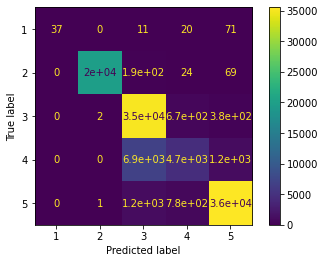

In [ ]:
plot_confusion_matrix(rfc_model, x_test, y_test)

In [ ]:
y_pred_rfc = rfc_model.predict(x_test)
accuracy_score(y_test, y_pred_rfc)

0.8919432966991783

We see that the problem is already at 89.19% with shallow learning

## Neural Network Comparisons

In [ ]:
def evaluate_model(model):
  callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)]

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
  model.summary()

  model.fit(x_train, y_train, batch_size=32, epochs=300, verbose=2, callbacks=callbacks_list, validation_split=0.2)

  acc = model.evaluate(x_test, y_test)
  print("Loss:", acc[0], " Accuracy:", acc[1])


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Basic MLP with only one hidden layer, minimum to qualify for DL
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=32))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

evaluate_model(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 198       
Total params: 1,254
Trainable params: 1,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3167/3167 - 7s - loss: 0.5806 - accuracy: 0.8025 - val_loss: 0.5096 - val_accuracy: 0.8340
Epoch 2/100
3167/3167 - 6s - loss: 0.4398 - accuracy: 0.8477 - val_loss: 0.4758 - val_accuracy: 0.8536
Epoch 3/100
3167/3167 - 7s - loss: 0.4037 - accuracy: 0.8613 - val_loss: 0.4784 - val_accuracy: 0.8534
Epoch 4/100
3167/3167 - 7s - loss: 0.3780 - accuracy: 0.8702 - val_loss: 0.4370 - val_accuracy: 0.8698
Epoch 5/100
3167/3167 - 6s - loss: 0.3602 - accuracy: 0.8763 - val_loss: 0.4730 - val_accuracy: 0.8581

## Minimal MLP Design Choices

- for our minimal MLP model we used 32 input nodes (corresponding to the 32 dimensions of the data), 6 output nodes corresponding to the 6 output categories
- we chose relu (rectified linear) because ...
- we chose softmax as the output node because we have a multi-class classification problem. With 6 categories we do not a binary classficiation problem so the sigmoid function which only outputs 0-1, is not appropriate.
- even with very modest network we achieve high accuracy rates on our test data at 89.33%

In [ ]:
# Excessive large FC Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=32))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

evaluate_model(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_20 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

In [ ]:
# Excessive large FC Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=32))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

evaluate_model(model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_45 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_46 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_47 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_49 (Dense)             (None, 512)              

## Reasonable MLP model
- using two hidden layers of 32 and then 64 neurons yielded teh best results when experimenting various combinations of layers and nodes. This is because we are inherently limited with models only using the Dense layer. 

In [ ]:
# MLP with only one two hidden layers, fully FC model that produced best results 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=32))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

evaluate_model(model)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_54 (Dense)             (None, 6)                 390       
Total params: 3,558
Trainable params: 3,558
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
12468/12468 - 27s - loss: 0.4144 - accuracy: 0.8571 - val_loss: 0.4663 - val_accuracy: 0.8569
Epoch 2/300
12468/12468 - 26s - loss: 0.3203 - accuracy: 0.8870 - val_loss: 0.3337 - val_accuracy: 0.8993
Epoch 3/300
12468/12468 - 26s - loss: 0.2948 - accuracy: 0.8950 - val_loss: 0.4151 - val_accuracy: 0.8629
Epoch 4/300
12468/12468 - 26s - loss: 0.2798 - accuracy: 0.8999 

## Auto-Optimised Models

Here, before attempting to use more appropriate CNN and RNNs, we are going to attempt one last time to get the best performance using only dense/fully-connected layers, by using the keras-tuner package to tune the hyperparameters of our model. Usually in machine learning we manually change each of these through trial and error, but with this package we can automate the combinatory process of optimising each hyperparameter. Here we have decided to auto-optimise the hyperperameters controlling the number of hidden layers, and the nb of neurons in each of those hidden layers

In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch

In [ ]:
def build_model(hp):
  d1 = hp.Int("d1_units", min_value=6, max_value=256, step=16)

  model = keras.models.Sequential()
  model.add(tf.keras.layers.Dense(d1, activation='relu', input_dim=32))

  for i in range(hp.Int('n_layers', 1, 8)):  # adding variation of layers.
        model.add(Dense(hp.Int(f'conv_{i}_units',
                                min_value=6,
                                max_value=256,
                                step=16), activation='relu'))
        
  
  model.add(Dense(6, activation='softmax'))
  
  model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
  return model

In [ ]:
tuner = RandomSearch(build_model, objective="val_accuracy", max_trials=5,executions_per_trial=5)
tuner.search(x=x_train,y=y_train,epochs=15,validation_data=(x_test,y_test))

Trial 5 Complete [00h 50m 10s]
val_accuracy: 0.917763352394104

Best val_accuracy So Far: 0.9192193508148193
Total elapsed time: 04h 20m 50s
INFO:tensorflow:Oracle triggered exit
